In [15]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/kastrahl/Data-science/main/diabetes.csv')
#display the head (first 5 rows) og the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# !pip install -U pandas-profiling


In [17]:
profile = ProfileReport(df)
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
# Extract Features
X = df.iloc[:, :8]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [21]:
# Extract Class Labels
y = df["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)   
print(X_train.shape)

(576, 8)


In [23]:
print(y_train.shape)

(576,)


In [24]:
print(X_test.shape)

(192, 8)


In [25]:
# Normalize Features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [26]:
# View first 5 rows
X_train[:5, :]

array([[ 1.50755225, -1.01521454, -0.40451932, -1.31921491, -0.71823753,
        -1.22070104, -0.98325882, -0.04863985],
       [-0.82986389, -0.09964691, -0.61509602,  0.9287299 ,  0.08374747,
         0.13719053, -0.62493647, -0.88246592],
       [-1.12204091, -0.95207195,  0.54307587, -1.31921491, -0.71823753,
         0.0240329 ,  0.39884168, -0.5489355 ],
       [ 2.38408331,  0.59492164,  0.64836422,  1.36583027,  2.05458297,
         0.87900167,  0.17903049,  2.03592532],
       [ 1.50755225,  0.75277813,  0.54307587,  1.55315901,  0.39089067,
         0.71555175,  0.50724171,  0.53503839]])

testing which of the svm classifications , linear , polynomial , rbf or sigmoidal gives us the best accuracy

In [27]:
# SVM Kernels
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.7638888888888888
poly
0.7934027777777778
rbf
0.8246527777777778
sigmoid
0.6510416666666666


In [28]:
# Using the best model
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

WITH PCA 
-------------------------------------------------------------------

In [29]:
from sklearn.decomposition import PCA # to apply PCA
import seaborn as sns # to plot the heat maps


In [30]:
df1 = pd.read_csv('https://raw.githubusercontent.com/kastrahl/Data-science/main/diabetes.csv')
#display the head (first 5 rows) og the dataset
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
# Extract Features from dataframe to 
X = df1.iloc[:, :8]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [32]:
# Extract Class Labels
y = df1["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [33]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)   
print(X_train.shape)

(576, 8)


In [34]:
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(X_train)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7
0,1.507552,-1.015215,-0.404519,-1.319215,-0.718238,-1.220701,-0.983259,-0.048640
1,-0.829864,-0.099647,-0.615096,0.928730,0.083747,0.137191,-0.624936,-0.882466
2,-1.122041,-0.952072,0.543076,-1.319215,-0.718238,0.024033,0.398842,-0.548935
3,2.384083,0.594922,0.648364,1.365830,2.054583,0.879002,0.179030,2.035925
4,1.507552,0.752778,0.543076,1.553159,0.390891,0.715552,0.507242,0.535038
...,...,...,...,...,...,...,...,...
571,1.799729,-0.636359,0.332499,1.678045,0.817478,0.086898,-0.895937,2.452838
572,0.923198,1.194776,-0.193943,-1.319215,-0.718238,-0.227429,-0.257581,0.201508
573,0.046667,-0.857358,-0.246587,0.054529,-0.718238,-0.944093,-0.965192,-1.049231
574,2.091906,-1.141500,0.227211,-1.319215,-0.718238,-0.265148,-0.507503,0.118125


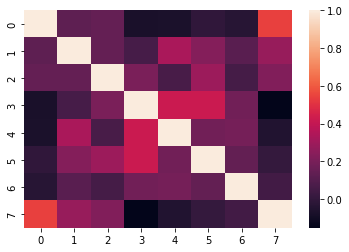

In [35]:
sns.heatmap(scaled_data.corr())

In [12]:
#Applying Principal Component Analysis we have taken n_components = 4, which means our final feature set will have 3 columns
pca = PCA(n_components = 5)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
data_pca.head()

,PC1,PC2,PC3,PC4
0,-2.139329,1.358477,-0.205695,-0.162703
1,-0.133106,-1.460380,-0.177185,-0.680194
2,-1.171698,-0.572368,-0.630002,0.807106
3,3.001145,1.966101,0.322822,-0.284330
4,2.078717,0.793118,-0.218193,0.205987


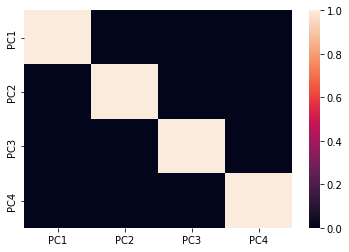

In [13]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

In [14]:
# SVM Kernels
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(data_pca, y_train)
    y_pred = model.predict(data_pca)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.7291666666666666
poly
0.7152777777777778
rbf
0.7708333333333334
sigmoid
0.6232638888888888
